# Цели проекта

Мы работаем над проекто UNICEF, главная цель которого - отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Задача проекта - провести анализ данных и выявить самые значимые данные для дальнейшего построения модели.

Давайте импортируем необходимые нам библиотеки и посмотрим, что же у нас есть:

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [2]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Как мы можем наблюдать, у нас имеются данные о 395 учениках. 13 столбцов имеют числовый тип, 17 - строковый. Почти во всех столбцах мы наблюдаем пропуски, но их значение не очень велико.

Для дальнейшего удобства работы приведем названия колонок в нижний регистр

In [3]:
stud.columns = map(str.lower, stud.columns)

# Обозначения в нашем датасете:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

На данном этапе мы заметили интересный момент - колонки studytime, granular нет в описании. Возможно, она лишняя. Это нужно будет проверить.

# Количество пропусков в каждом столбце

In [4]:
stud.isna().sum().sort_values(ascending=False)

pstatus                45
paid                   40
famsup                 39
fjob                   36
internet               34
romantic               31
guardian               31
traveltime             28
famsize                27
famrel                 27
fedu                   24
failures               22
higher                 20
mjob                   19
reason                 17
address                17
nursery                16
health                 15
activities             14
absences               12
freetime               11
schoolsup               9
goout                   8
studytime               7
studytime, granular     7
score                   6
medu                    3
age                     0
sex                     0
school                  0
dtype: int64

Здесь перед нами встает вопрос - можем ли мы заполнить пропуски? Я считаю, что в данный момент мы не обладаем достаточным количеством информации, чтобы это сделать. Теоретически мы можем заменить пустые значения на моду или медиану, но пока этого делать не будем.

Не стоит забывать про наш главный столбец - score. Рассмотрим его поподробнее.

In [5]:
stud.score.value_counts(dropna=False)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Мы видим в нем 6 пустых значений. Можем смело их выбрасывать.

In [6]:
stud = stud.dropna(subset=['score'])

# Выбросы

Напишем функцию, которая покажет нам выбросы в числовых столбцах:

In [36]:
def show_outliners():
    for column_name in stud:
        column = stud[column_name]
        if column.dtype in ['int64', 'float64']:
            IQR = column.quantile(0.75) - column.quantile(0.25)
            outliners = {
                "left": column.quantile(0.25) - 1.5 * IQR,
                "right": column.quantile(0.75) + 1.5 * IQR
            }
            print(column_name, outliners)


show_outliners()

age {'left': 13.0, 'right': 21.0}
Medu {'left': -1.0, 'right': 7.0}
Fedu {'left': 0.5, 'right': 4.5}
traveltime {'left': -0.5, 'right': 3.5}
studytime {'left': -0.5, 'right': 3.5}
failures {'left': 0.0, 'right': 0.0}
studytime, granular {'left': -10.5, 'right': 1.5}
famrel {'left': 2.5, 'right': 6.5}
freetime {'left': 1.5, 'right': 5.5}
goout {'left': -1.0, 'right': 7.0}
health {'left': 0.0, 'right': 8.0}
absences {'left': -12.0, 'right': 20.0}
score {'left': -5.0, 'right': 115.0}


In [8]:
numeric_columns = ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'studytime, granular',
                   'famrel', 'freetime', 'goout', 'health', 'absences', 'score']

А теперь посмотрим на гистограммы этих признаков:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002889C1B7908>,
      dtype=object)

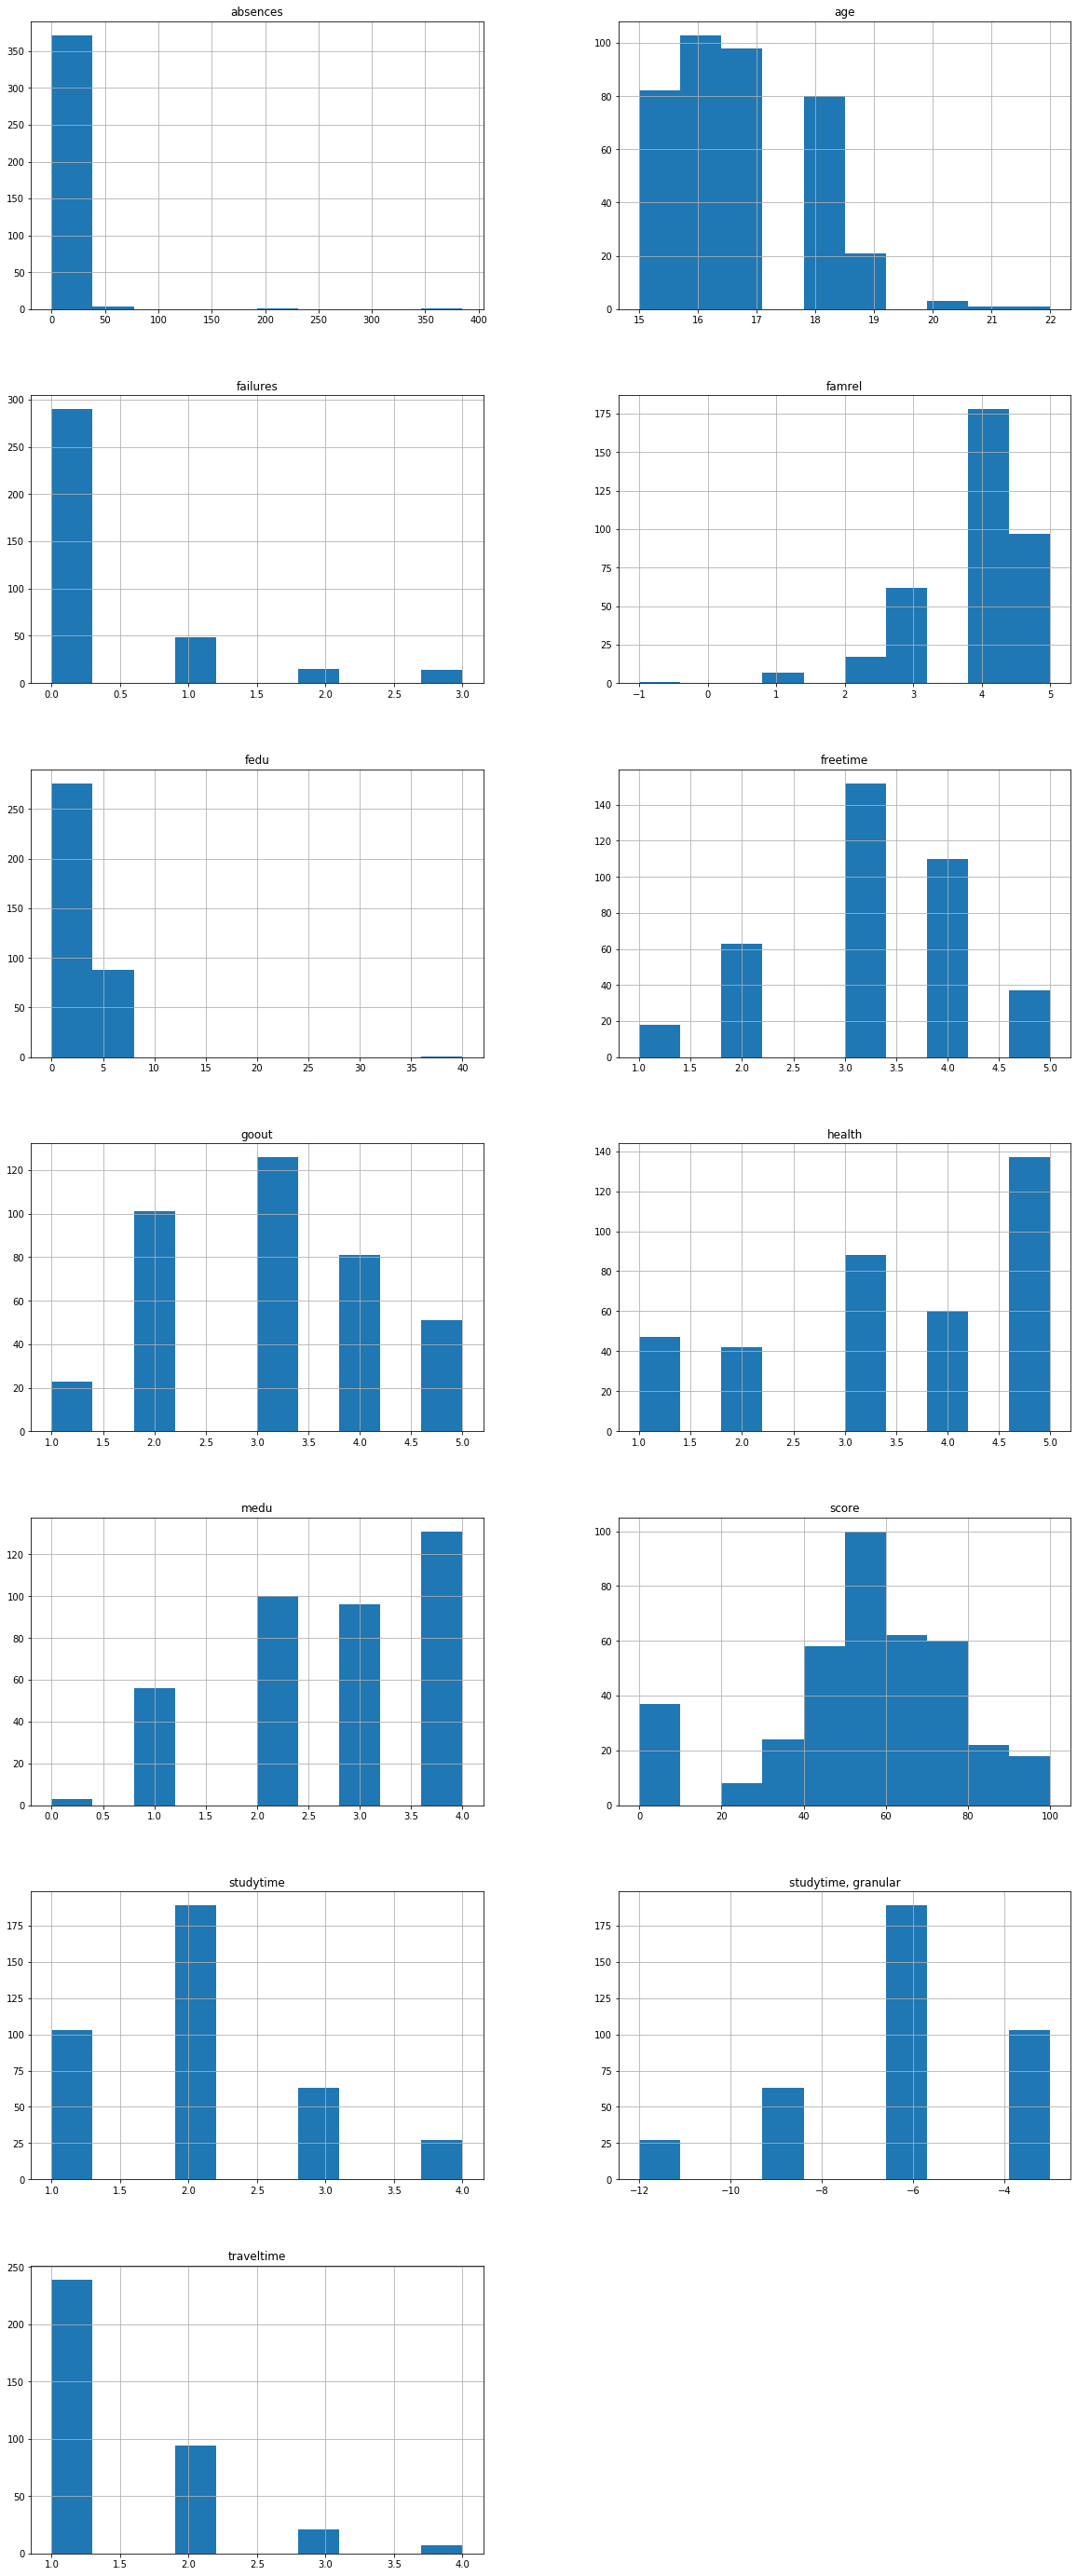

In [9]:
stud[numeric_columns].hist(layout=(7, 2), figsize=(20, 50), bins=10)

В графе age мы наблюдаемый интересный момент. По формуле мы должны убрать учеников старше 21 года, так как они считаются выбросами, но здравый смысл подсказывает, что делать это не стоит, поэтому оставим эту графу без изменений.

Также есть странности в столбцах fedu и famrel. В fedu это значение '40', а в famrel '-1'. Вероятно, была допущена ошибка при вводе. Заменим эти значения:

In [10]:
stud.fedu = stud.fedu.replace(40, 4)

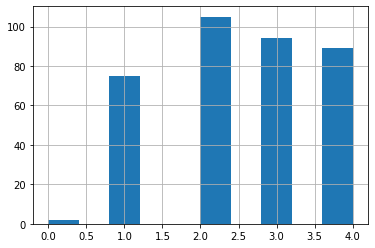

In [11]:
stud.fedu.hist()

In [35]:
stud.famrel = stud.famrel.replace(-1, 1)

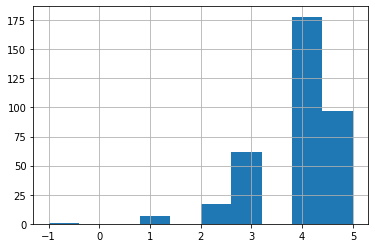

In [12]:
stud.famrel.hist()

Также мы наблюдаем странность в графе absences. Рассмотрим её повнимательнее:

0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

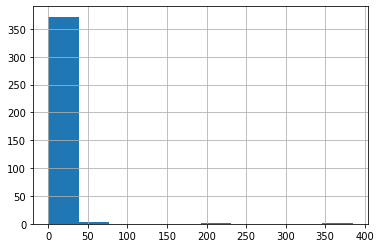

In [13]:
stud.absences.hist()
stud.absences.describe()
stud.absences.value_counts()

Исходя из формулы интерквартильного расстояния можно сделать вывод, что у нас весёлые ученики :) 

Ладно, будем серьезными! У нас очевидно наблюдаются нереальные значения (некоторые ученики пропустили учебных дней больше, чем всего дней в году). Это, мягко говоря, странно. Однако формула высчитала для нас довольно низкий высокий порог, поскольку есть немало учеников, которые пропустили больше 20 дней. Найдем золотую середину:

In [37]:
stud["absences"][stud["absences"] > 40] = 40

count    378.000000
mean       5.780423
std        7.468550
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       40.000000
Name: absences, dtype: float64

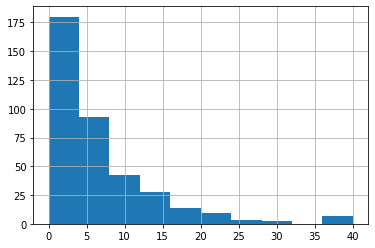

In [15]:
stud.absences.hist()
stud.absences.describe()

# Корреляционный анализ

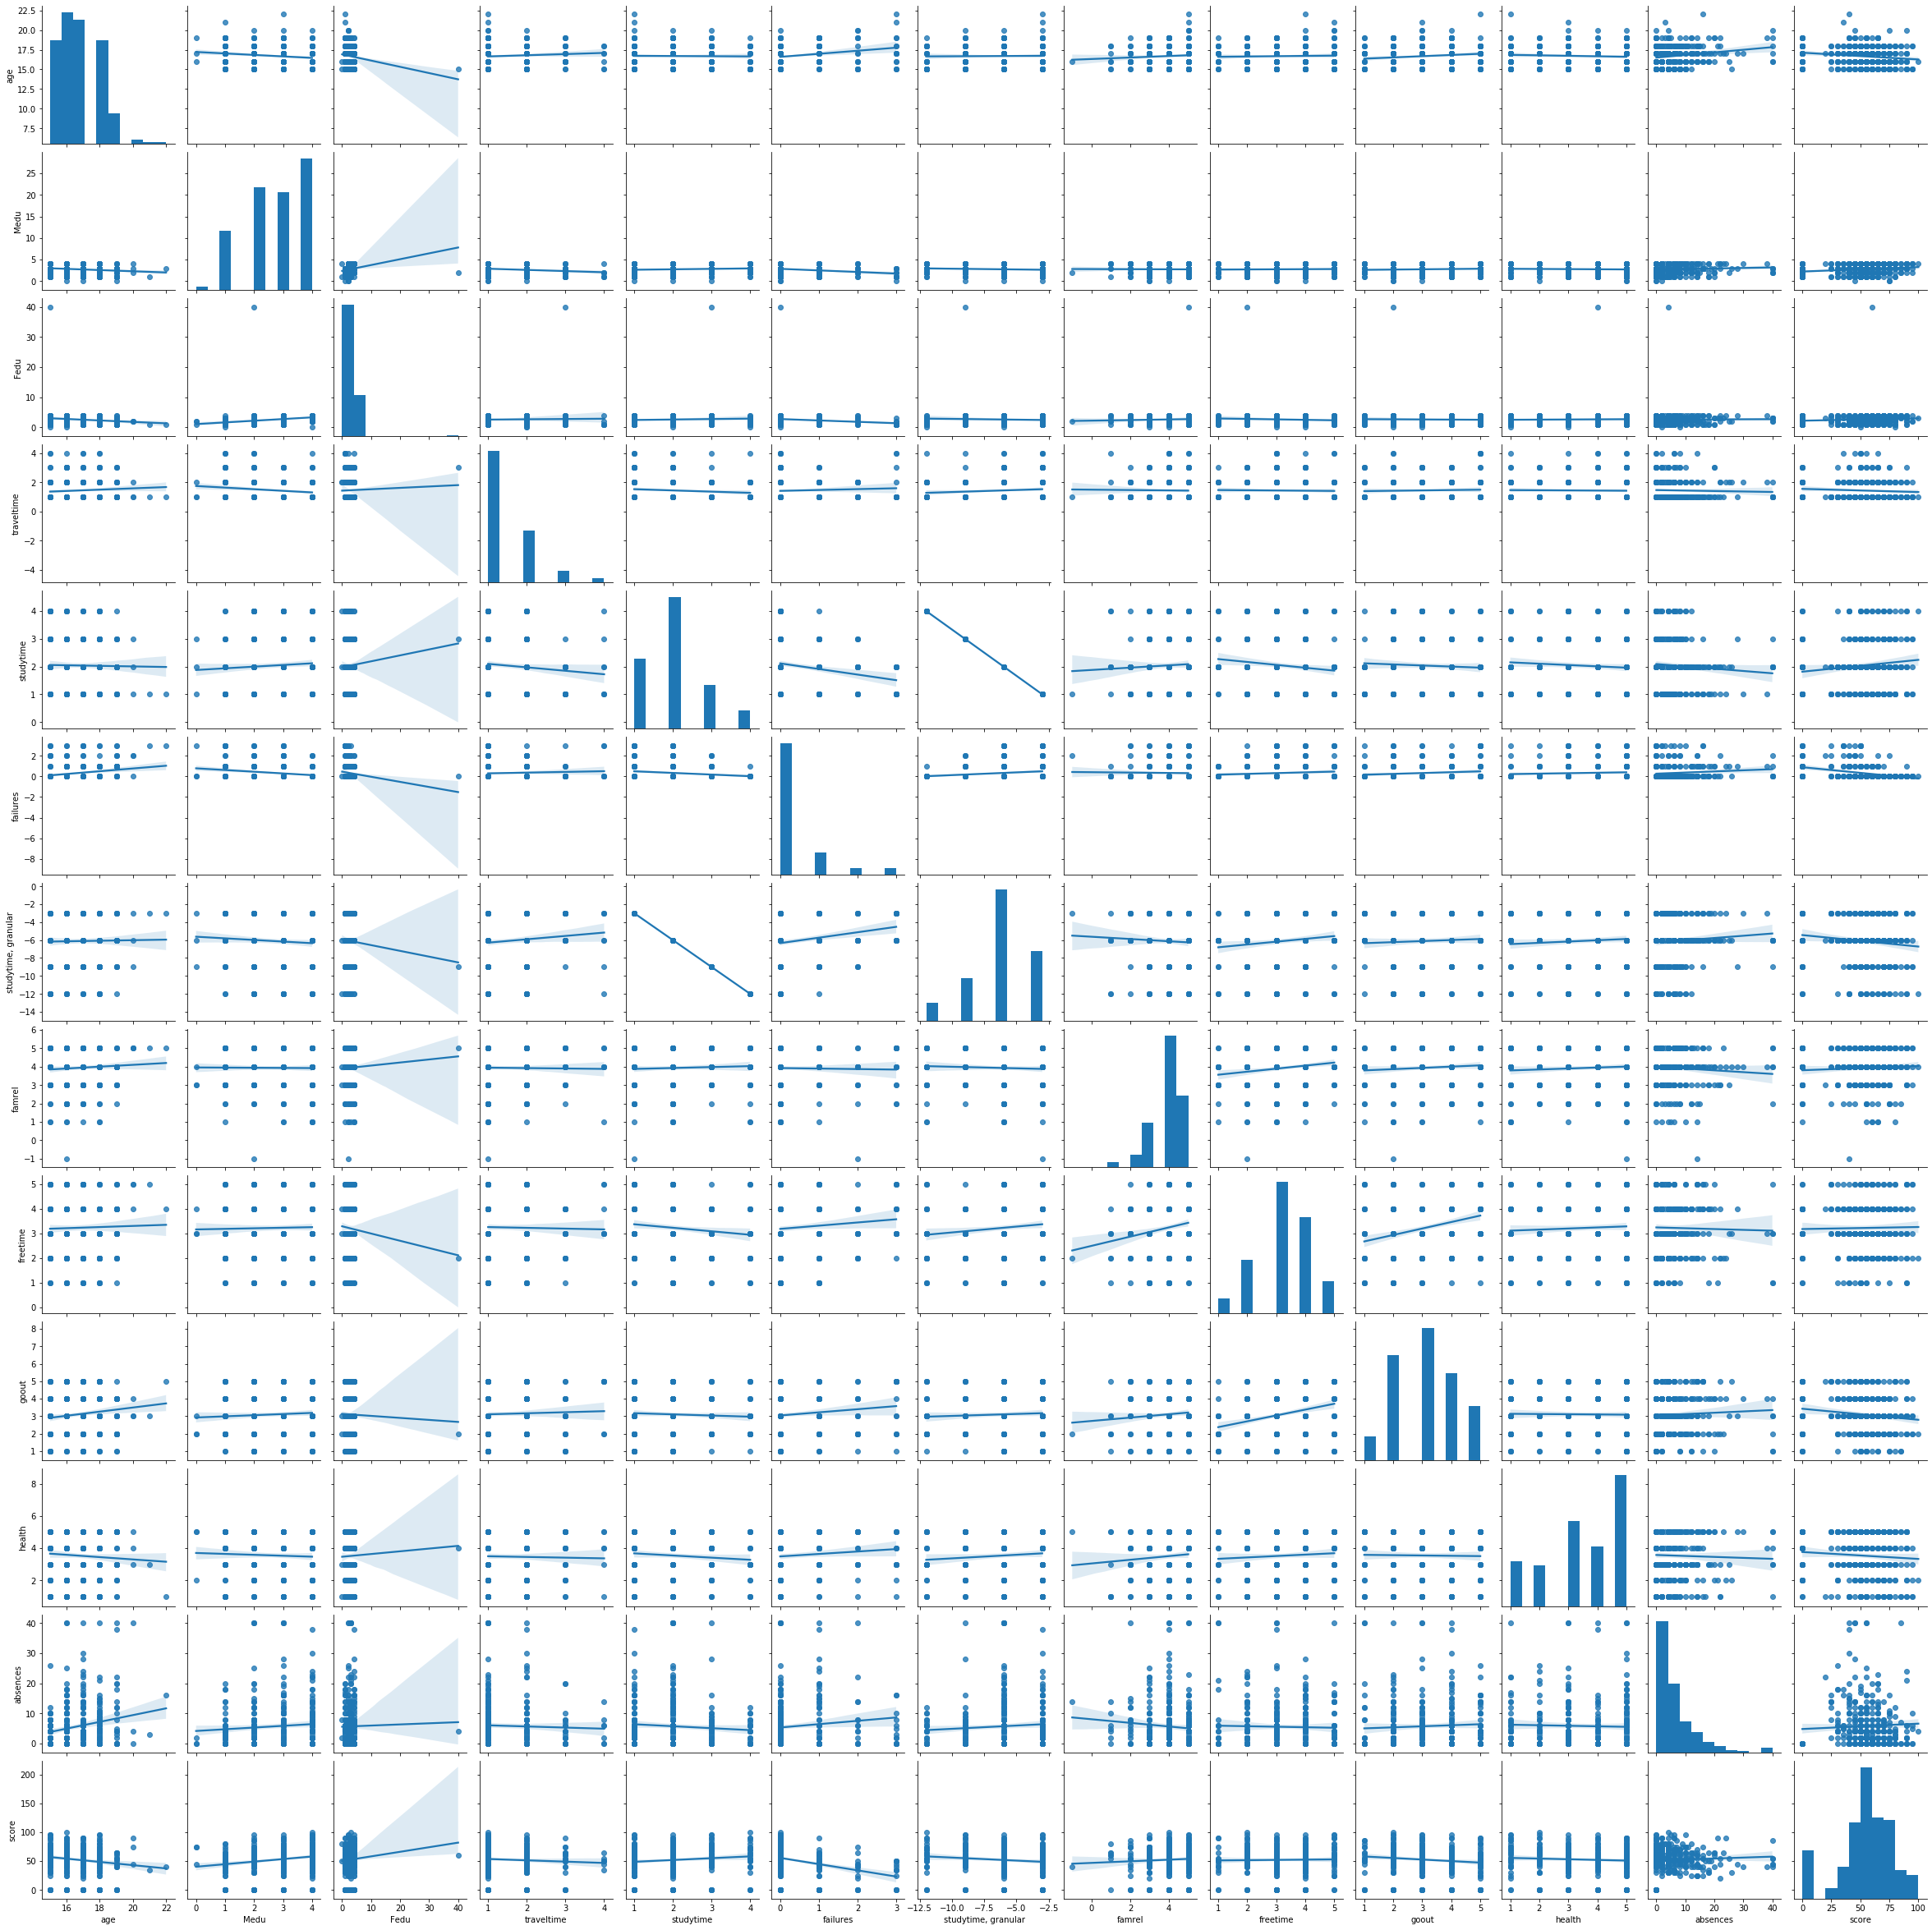

In [38]:
sns.pairplot(stud, kind='reg')

In [17]:
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.146736,-0.152148,0.073146,-0.018227,0.205919,0.018227,0.060414,0.016099,0.121115,-0.068103,0.198564,-0.155726
medu,-0.146736,1.000000,0.621981,-0.165838,0.081032,-0.240319,-0.081032,0.000602,0.038265,0.072320,-0.048331,0.082035,0.213349
fedu,-0.152148,0.621981,1.000000,-0.132036,0.017306,-0.273286,-0.017306,-0.013287,-0.017263,0.050997,0.018624,0.042215,0.130923
traveltime,0.073146,-0.165838,-0.132036,1.000000,-0.105910,0.049738,0.105910,-0.027395,-0.026299,0.032629,-0.011724,-0.035143,-0.070559
studytime,-0.018227,0.081032,0.017306,-0.105910,1.000000,-0.181947,-1.000000,0.046249,-0.125066,-0.053831,-0.079180,-0.071565,0.115741
failures,0.205919,-0.240319,-0.273286,0.049738,-0.181947,1.000000,0.181947,-0.034836,0.091608,0.107747,0.088013,0.109062,-0.344338
"studytime, granular",0.018227,-0.081032,-0.017306,0.105910,-1.000000,0.181947,1.000000,-0.046249,0.125066,0.053831,0.079180,0.071565,-0.115741
famrel,0.060414,0.000602,-0.013287,-0.027395,0.046249,-0.034836,-0.046249,1.000000,0.174193,0.076387,0.080089,-0.077138,0.057112
freetime,0.016099,0.038265,-0.017263,-0.026299,-0.125066,0.091608,0.125066,0.174193,1.000000,0.296338,0.064315,-0.021282,0.019026
goout,0.121115,0.072320,0.050997,0.032629,-0.053831,0.107747,0.053831,0.076387,0.296338,1.000000,-0.018026,0.053034,-0.129685


Исходя из корреляции видно, что колонка studytime, granular повторяет столбец studytime, поэтому мы можем смело её удалять:

In [18]:
del stud["studytime, granular"]

Также мы видим, что колонки age, medu, fedu, studytime, failures, goout обладают ощутимым процентом корреляции. Поэтому их мы оставляем точно, другие можно убирать.

In [19]:
stud.drop(['traveltime', 'famrel', 'freetime',
           'health', 'absences'], axis=1, inplace=True)

In [20]:
stud

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,2.0,0.0,no,yes,no,no,no,yes,yes,no,3.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,2.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,2.0,0.0,no,yes,yes,no,yes,yes,no,no,2.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,2.0,2.0,no,yes,yes,no,yes,yes,no,no,4.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,1.0,0.0,no,no,no,no,no,yes,yes,no,5.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,3.0,NaN,no,no,no,no,NaN,no,no,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,1.0,0.0,no,no,no,NaN,no,yes,yes,no,1.0,50.0


# Номинативный анализ

In [21]:
nominative__columns = ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup',
                       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [22]:
# напишем функцию, для показа боксплотов:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

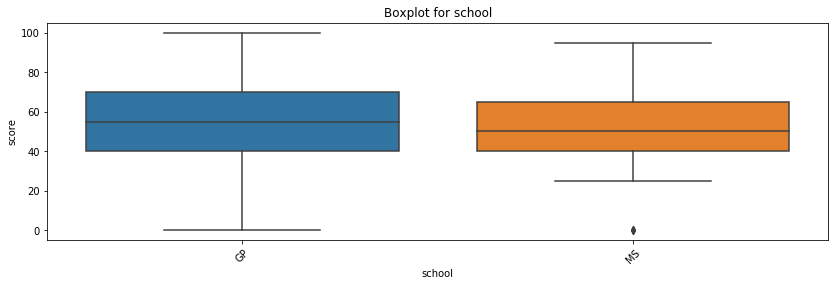

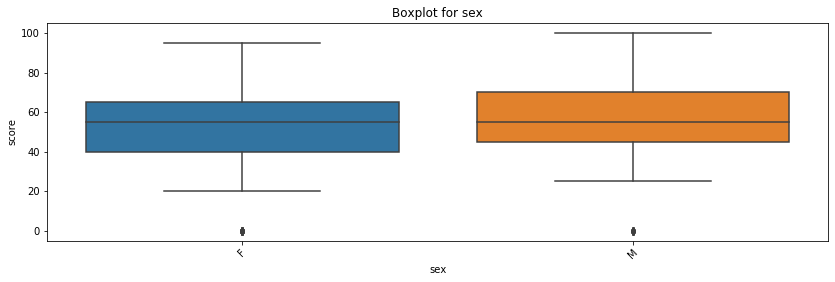

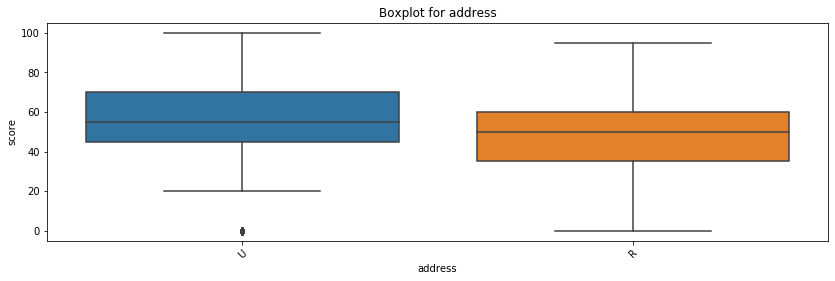

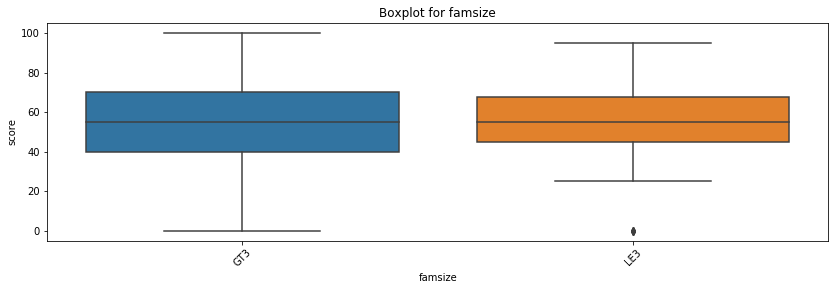

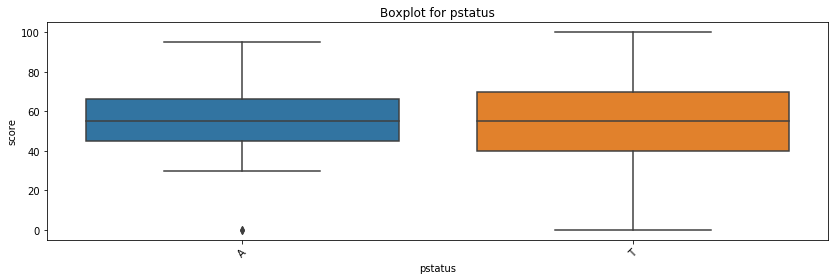

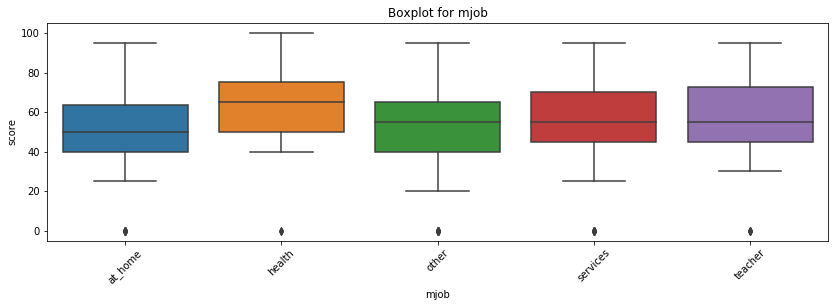

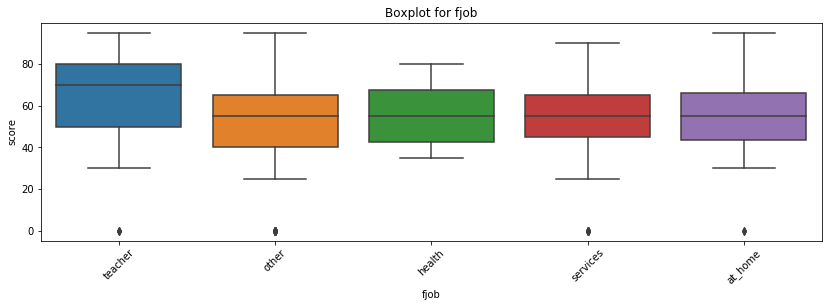

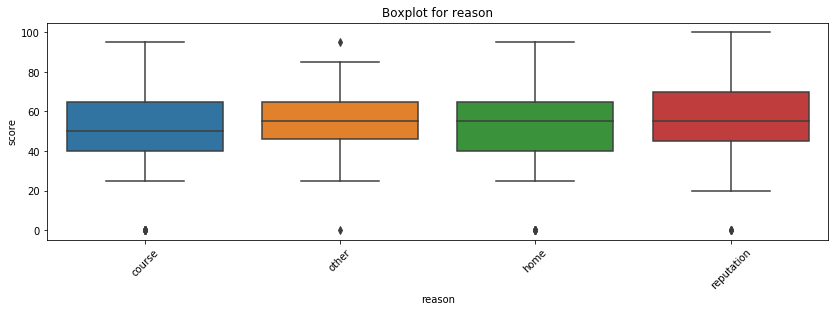

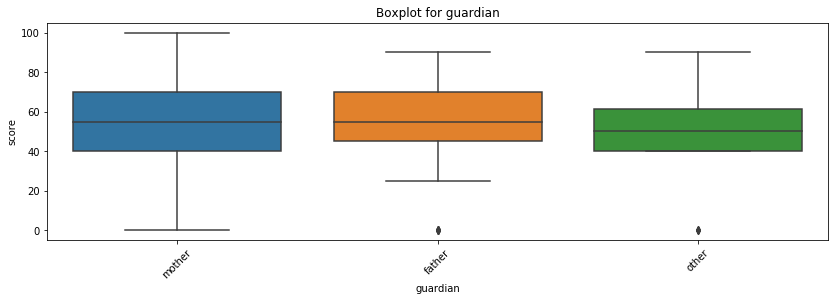

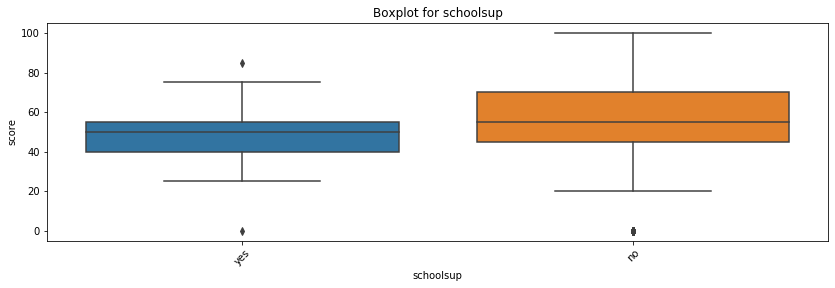

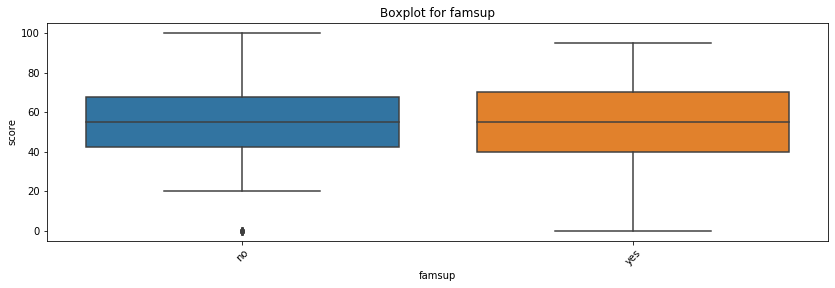

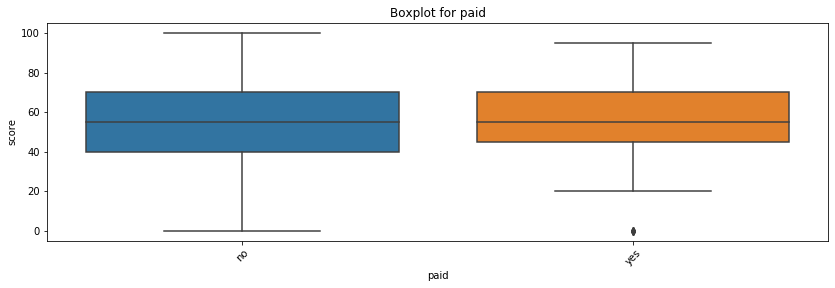

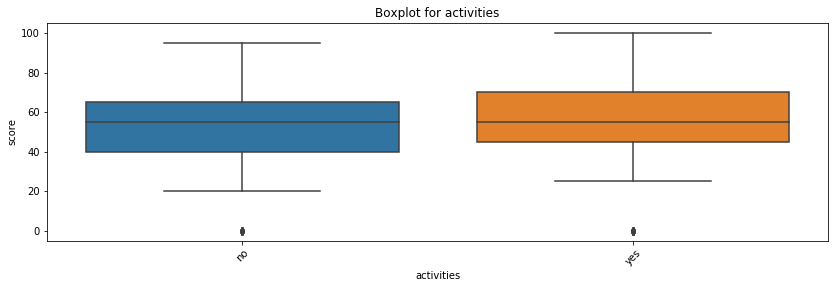

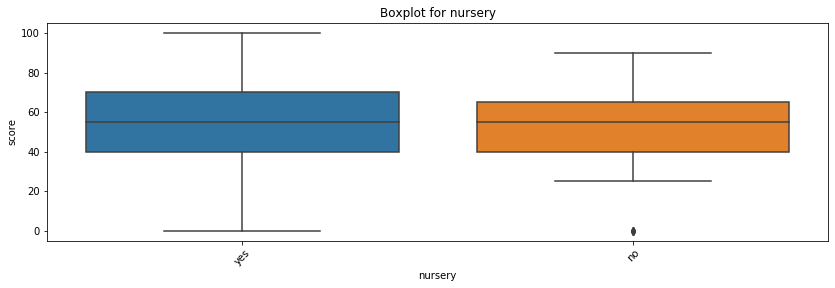

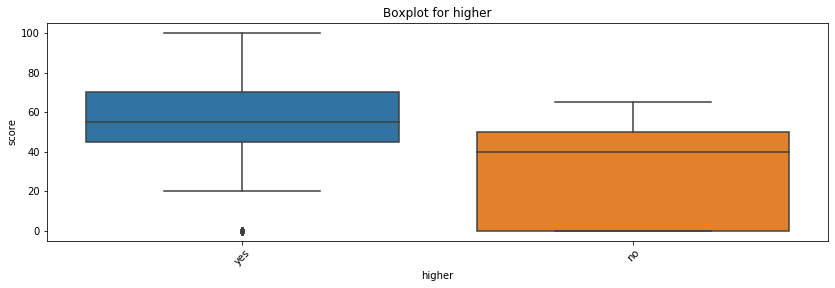

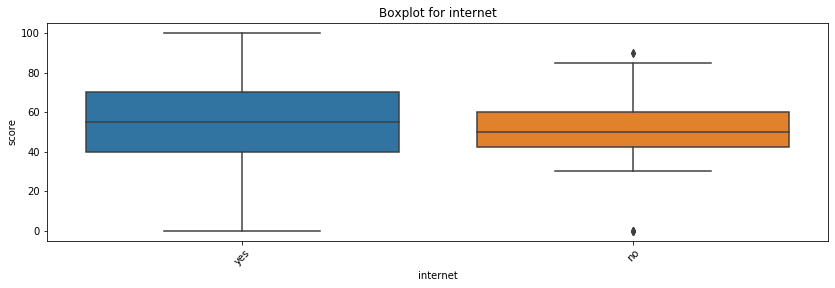

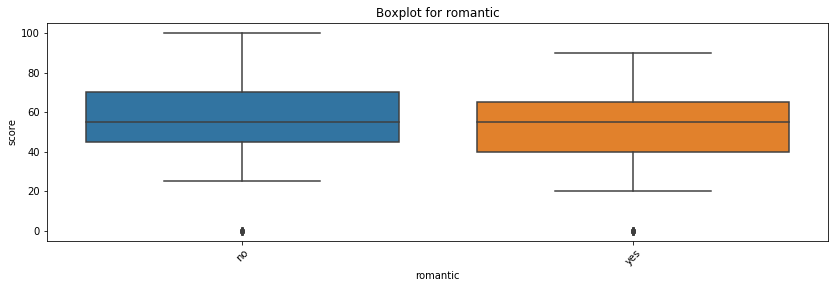

In [23]:
for col in nominative__columns:
    get_boxplot(col)

На первый взгляд мы видим немало столбцов, которые имеют явную зависимость с итоговыми баллами. Давайте проверим это наверняка с помощью теста Стьюдента:

In [31]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.1/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [32]:
for col in nominative__columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Есть один интересный момент. В зависимости от того, насколько в формуле применяется поправка Бонферони (на 0.1 или на 0.05), у нас изменяются итоговые статистические различия. Исходя из того, что мы видим на боксплотах я делаю вывод, что оставлю значение на 0.1

Очень любопытно! Получается, что работа мамы влияет на ребенка больше, чем работа отца.  
Согласимся с полученным результатом и выбросим колонки, которые не влияют на итоговую оценку:

In [33]:
stud.drop(['school', 'famsize', 'pstatus', 'fjob', 'reason', 'guardian', 'famsup', 'activities',
           'nursery', 'internet'], axis=1, inplace=True)

In [34]:
#посмотрим на наш итог:
stud.head()

,sex,age,address,medu,fedu,mjob,studytime,failures,schoolsup,paid,higher,romantic,goout,score
0,F,18,U,4.0,4.0,at_home,2.0,0.0,yes,no,yes,no,4.0,30.0
1,F,17,U,1.0,1.0,at_home,2.0,0.0,no,no,yes,no,3.0,30.0
2,F,15,U,1.0,1.0,at_home,2.0,3.0,yes,NaN,yes,NaN,2.0,50.0
3,F,15,U,4.0,2.0,health,3.0,0.0,no,yes,yes,yes,2.0,75.0
4,F,16,U,3.0,3.0,other,2.0,0.0,no,yes,yes,no,2.0,50.0


# Выводы

1) В исходных данных присутствуют пустые значения, однако их немного. В теории их можно заполнить медианой и модой, но на данном этапе не думаю, что это необходимо.

2) В некоторых столбцах были явные ошибки, их мы исправили и привели данные в приличную форму.

3) Столбец studytime, granular	оказался копией studytime, его мы удалили.

4) Выбросы имели место быть, но в очень маленьком количестве.

5) Влияние большинства параметров на итоговую оценку достаточно логично.

6) Самые важные параметры для построения модели, это sex, age, address, medu, fedu, mjob, studytime, failures, schoolsup, paid, higher, romantic, goout и целевая переменная score.